#Important: Follow these steps to clone from kaggle

1. Go to your account, Scroll to API section and Click Expire API Token to remove previous tokens

2. Click on Create New API Token - It will download kaggle.json file on your machine.

3. In the next step, upload that 'kaggle.json' file


In [ ]:
from google.colab import files
import matplotlib.pyplot as plt

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"andrewlyubovsky","key":"03fa9a6fa92675f53ce513c19eb706de"}'}

In [ ]:
!git clone https://github.com/bahducoup/nlptrading.git

Cloning into 'nlptrading'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.


In [ ]:
! pip install -q kaggle

In [ ]:
 ! mkdir ~/.kaggle
 ! cp kaggle.json ~/.kaggle/
 ! chmod 600 ~/.kaggle/kaggle.json
 ! kaggle datasets download paultimothymooney/stock-market-data
 ! unzip stock-market-data.zip

Streaming output truncated to the last 5000 lines.
  inflating: stock_market_data/nasdaq/json/CSQ.json  
  inflating: stock_market_data/nasdaq/json/CSRE.json  
  inflating: stock_market_data/nasdaq/json/CSTE.json  
  inflating: stock_market_data/nasdaq/json/CSWC.json  
  inflating: stock_market_data/nasdaq/json/CTAS.json  
  inflating: stock_market_data/nasdaq/json/CTBI.json  
  inflating: stock_market_data/nasdaq/json/CTCM.json  
  inflating: stock_market_data/nasdaq/json/CTCT.json  
  inflating: stock_market_data/nasdaq/json/CTG.json  
  inflating: stock_market_data/nasdaq/json/CTHR.json  
  inflating: stock_market_data/nasdaq/json/CTIB.json  
  inflating: stock_market_data/nasdaq/json/CTIC.json  
  inflating: stock_market_data/nasdaq/json/CTRE.json  
  inflating: stock_market_data/nasdaq/json/CTRN.json  
  inflating: stock_market_data/nasdaq/json/CTRX.json  
  inflating: stock_market_data/nasdaq/json/CTSH.json  
  inflating: stock_market_data/nasdaq/json/CTSO.json  
  inflating: sto

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

Abberviation: OWL_CV (Open, High, Low, Close, Volume)

We need to create a dataset where: \\
  X contains:

1.   the 10 last OWL_CVs
2.   10 weeks of wednesday OWL_CVs
3.   Open
3.   Month
4.   Day of Week
  
Y contains:

1.   High, Low, Volume, Close
2.   2 (tomorrow), 3, 4, 5, 6, 7, 8 (Week from now), OWL_CVs \\
  a. Note: 2 High will be max of 1 High and 2 High \\
  b. Same with Low
3.   Month OWL_CV
4.   3 Month OWL_CV

Processing the different exchanges:


1.   Keep track of stocks we've seen
2.   If there is a new stock, add it to the table
3.   For each row, store the stock symbol


Possible Errors

* Stocks might be repeated in different exchanges under different names
* Stocks might have different information in different exchanges




In [ ]:
from os import walk

names = ['forbes2000','nasdaq', 'nyse','sp500']
markets = {}
for name in names:
  path = 'stock_market_data/'+name+'/csv/'
  markets[name] = next(walk(path), (None, None, []))[2]  # [] if no file

Observations:


*   For companies that only appear in SP500,
    *  many are international
    *  some have nothing special about them
*   only Z, UHS, ZION appear in all 4 markets
*   only 547 stocks are in 2 or more markets

As such, we decide to go with Nasdaq since it has the most stocks

In [ ]:
#Takes 30 seconds
stocks_dataset = pd.DataFrame(columns = ['Symbol', 'Date', 'Low', 'Open', 'Volume', 'High', 'Close', 'Adjusted Close'])

added_stocks = []
df_list = []
for market in markets:
  for stock in markets[market]:
    if(stock not in added_stocks):
      added_stocks.append(stock)
      csv = pd.read_csv('stock_market_data/'+ market +'/csv/'+ stock )
      csv['Symbol'] = stock[:-4]
      df_list.append(csv)
full_df = pd.concat(df_list, ignore_index = True)
full_df

,Date,Low,Open,Volume,High,Close,Adjusted Close,Symbol
0,28-06-1990,9.968750,10.093750,176400.0,10.093750,9.968750,2.215101,RIO
1,29-06-1990,10.000000,10.031250,69200.0,10.062500,10.062500,2.235931,RIO
2,02-07-1990,10.000000,10.000000,62000.0,10.031250,10.031250,2.228988,RIO
3,03-07-1990,10.031250,10.031250,29600.0,10.062500,10.062500,2.235931,RIO
4,05-07-1990,9.656250,9.718750,31200.0,9.718750,9.687500,2.152606,RIO
...,...,...,...,...,...,...,...,...
18937688,31-05-2022,438.519989,442.929993,828800.0,448.720001,442.350006,442.350006,MSCI
18937689,01-06-2022,425.100006,425.100006,600500.0,449.779999,431.450012,431.450012,MSCI
18937690,02-06-2022,431.010010,433.899994,417300.0,451.920013,451.619995,451.619995,MSCI
18937691,03-06-2022,435.690002,443.869995,298400.0,444.750000,438.450012,438.450012,MSCI


Start Cleaning Data



1.   Remove rows where a stock wasn't traded (Volume = 0)
2.   Remove rows that were Nan Values
3.   Keep only the stocks that have .99 percent of the data

  3.1 We keep 2152 / 3538 stocks (4/7) and they are clean



In [ ]:
full_df = full_df.loc[full_df['Volume'] != 0]
full_df = full_df.loc[full_df['Open'] != 0]
full_df = full_df.loc[full_df['Volume'].notna()]
len(full_df)

16341365

In [ ]:

percentages = []
num_days = []
num_observations = []
full_stocks = []
for symbol, symbol_data in full_df.groupby(by = 'Symbol'):
  num_observations.append(len(symbol_data))
  num_days.append(symbol_data.index[-1] - symbol_data.index[0]+1)
  percentages.append(num_observations[-1]/num_days[-1])
  if((percentages[-1] > .99) and (num_days[-1] > 365)):
    full_stocks.append(symbol)

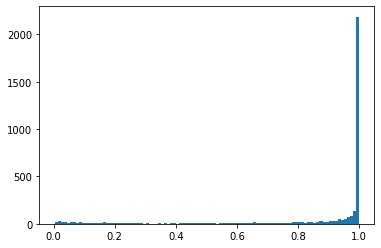

number of original stocks 3519
final stocks kept 2139


2139

In [ ]:
y_values, bin_edges, _ = plt.hist(percentages, bins = 100)
plt.show()

print('number of original stocks' ,   len(full_df.Symbol.unique()))
print('final stocks kept', len(full_stocks))
len(full_stocks)

In [ ]:
full_df = full_df.loc[full_df['Symbol'].isin(full_stocks)]

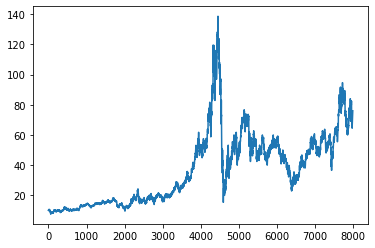

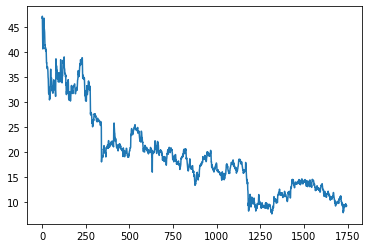

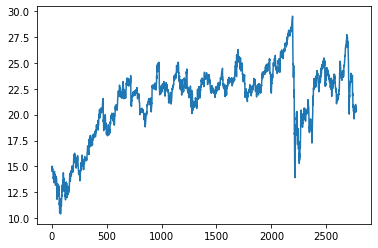

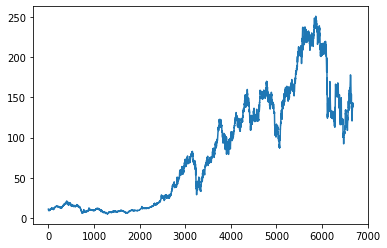

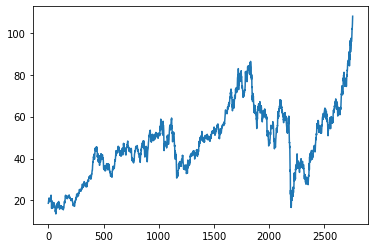

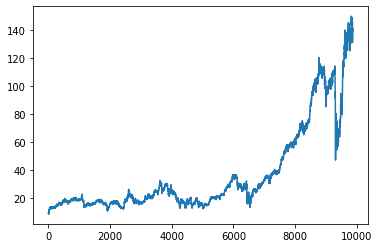

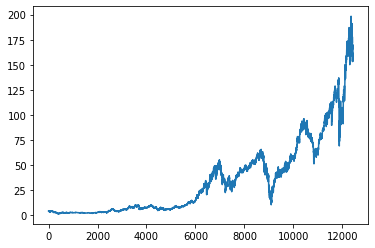

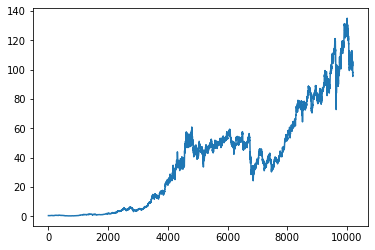

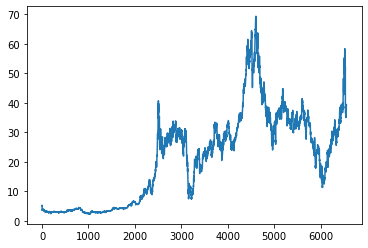

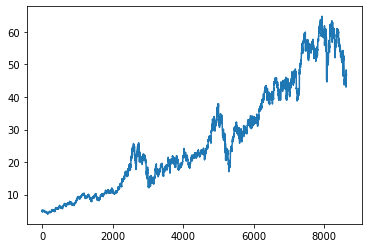

In [ ]:
percentages = []
num_days = []
num_observations = []
for symbol in full_df.Symbol.unique()[:10]:
  symbol_data = full_df.loc[full_df['Symbol'] == symbol]
  plt.plot(range(len(symbol_data)), symbol_data['Close'])
  plt.show()

# Splitting into training & Testing Data

In [ ]:
full_df

,Date,Low,Open,Volume,High,Close,Adjusted Close,Symbol
0,28-06-1990,9.968750,10.093750,176400.0,10.093750,9.968750,2.215101,RIO
1,29-06-1990,10.000000,10.031250,69200.0,10.062500,10.062500,2.235931,RIO
2,02-07-1990,10.000000,10.000000,62000.0,10.031250,10.031250,2.228988,RIO
3,03-07-1990,10.031250,10.031250,29600.0,10.062500,10.062500,2.235931,RIO
4,05-07-1990,9.656250,9.718750,31200.0,9.718750,9.687500,2.152606,RIO
...,...,...,...,...,...,...,...,...
18937688,31-05-2022,438.519989,442.929993,828800.0,448.720001,442.350006,442.350006,MSCI
18937689,01-06-2022,425.100006,425.100006,600500.0,449.779999,431.450012,431.450012,MSCI
18937690,02-06-2022,431.010010,433.899994,417300.0,451.920013,451.619995,451.619995,MSCI
18937691,03-06-2022,435.690002,443.869995,298400.0,444.750000,438.450012,438.450012,MSCI


In [ ]:
full_df['Date'] = pd.to_datetime(full_df['Date'], dayfirst = True)

In [ ]:
train_df = full_df.loc[full_df.Date.dt.year <  2016]
test_df  = full_df.loc[full_df.Date.dt.year >= 2016]

In [ ]:
print(len(train_df))
print(len(test_df))

8269867
3344308


In [ ]:
train_df

,Date,Low,Open,Volume,High,Close,Adjusted Close,Symbol
0,1990-06-28,9.968750,10.093750,176400.0,10.093750,9.968750,2.215101,RIO
1,1990-06-29,10.000000,10.031250,69200.0,10.062500,10.062500,2.235931,RIO
2,1990-07-02,10.000000,10.000000,62000.0,10.031250,10.031250,2.228988,RIO
3,1990-07-03,10.031250,10.031250,29600.0,10.062500,10.062500,2.235931,RIO
4,1990-07-05,9.656250,9.718750,31200.0,9.718750,9.687500,2.152606,RIO
...,...,...,...,...,...,...,...,...
18936070,2015-12-24,71.940002,71.949997,243800.0,72.570000,72.349998,67.721214,MSCI
18936071,2015-12-28,71.769997,72.169998,444300.0,72.449997,72.379997,67.749298,MSCI
18936072,2015-12-29,72.330002,72.760002,266800.0,73.379997,72.849998,68.189255,MSCI
18936073,2015-12-30,72.489998,72.660004,245200.0,73.440002,72.589996,67.945869,MSCI


In [ ]:
train_df.to_csv('train_df.csv')
train_df['Date'] = pd.to_datetime(train_df['Date'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
test_df.to_csv('test_df.csv')

In [ ]:
from google.colab import auth
auth.authenticate_user()

# https://cloud.google.com/resource-manager/docs/creating-managing-projects
project_id = 'nlptrading'
!gcloud config set project {project_id}

Updated property [core/project].


The Next section uploads the datasets to Google Storage. As such it is commented out

In [ ]:
# import uuid
# # Make a unique bucket to which we'll upload the file.
# # (GCS buckets are part of a single global namespace.)
# bucket_name = 'nlptrading-dataset'

# # Full reference: https://cloud.google.com/storage/docs/gsutil/commands/mb
# !gsutil mb gs://{bucket_name}

# # Copy the file to our new bucket.
# # Full reference: https://cloud.google.com/storage/docs/gsutil/commands/cp
# !gsutil -o GSUtil:parallel_composite_upload_threshold=150M  cp test_df.csv gs://{bucket_name}/
# !gsutil -o GSUtil:parallel_composite_upload_threshold=150M  cp train_df.csv gs://{bucket_name}/
  
# # Finally, dump the contents of our newly copied file to make sure everything worked.
# #!gsutil cat gs://{bucket_name}/to_upload.txt

Creating gs://nlptrading-dataset/...
Copying file://test_df.csv [Content-Type=text/csv]...
- [1 files][384.5 MiB/384.5 MiB]                                                
Operation completed over 1 objects/384.5 MiB.                                    
Copying file://train_df.csv [Content-Type=text/csv]...
| [1 files][882.5 MiB/882.5 MiB]                                                
Operation completed over 1 objects/882.5 MiB.                                    


Uncomment out the next sections to download the files form Google Storage 

In [ ]:
# bucket_name = 'nlptrading-dataset'
# !gsutil cp gs://{bucket_name}/test_df.csv test_df.csv
# !gsutil cp gs://{bucket_name}/train_df.csv train_df.csv

Copying gs://nlptrading-dataset/test_df.csv...
- [1 files][384.5 MiB/384.5 MiB]                                                
Operation completed over 1 objects/384.5 MiB.                                    
Copying gs://nlptrading-dataset/train_df.csv...
/ [1 files][882.5 MiB/882.5 MiB]   71.6 MiB/s                                   
Operation completed over 1 objects/882.5 MiB.                                    


In [ ]:
import pandas as pd

In [ ]:
train_df = pd.read_csv('train_df.csv', index_col=0)
train_df['Date'] = pd.to_datetime(train_df['Date'])

test_df = pd.read_csv('test_df.csv', index_col=0)
test_df['Date'] = pd.to_datetime(test_df['Date'])

Creating New Features



1.   Percentage Increase
2.   Percentage High, Low
3.   Day of Week
4.   



In [ ]:
train_df['Return'] = 1 + (train_df.Close - train_df.Open)/train_df.Open
train_df['Day_of_week'] = train_df['Date'].dt.weekday
train_df = pd.concat([train_df,pd.get_dummies(train_df.Day_of_week, prefix='weekday')], axis=1)

test_df['Return'] = 1 + (test_df.Close - test_df.Open)/test_df.Open
test_df['Day_of_week'] = test_df['Date'].dt.weekday
test_df = pd.concat([test_df,pd.get_dummies(test_df.Day_of_week, prefix='weekday')], axis=1)

train_df

,Date,Low,Open,Volume,High,Close,Adjusted Close,Symbol,Return,Day_of_week,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4
0,1990-06-28,9.968750,10.093750,176400.0,10.093750,9.968750,2.215101,RIO,0.987616,3,0,0,0,1,0
1,1990-06-29,10.000000,10.031250,69200.0,10.062500,10.062500,2.235931,RIO,1.003115,4,0,0,0,0,1
2,1990-07-02,10.000000,10.000000,62000.0,10.031250,10.031250,2.228988,RIO,1.003125,0,1,0,0,0,0
3,1990-07-03,10.031250,10.031250,29600.0,10.062500,10.062500,2.235931,RIO,1.003115,1,0,1,0,0,0
4,1990-07-05,9.656250,9.718750,31200.0,9.718750,9.687500,2.152606,RIO,0.996785,3,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18936070,2015-12-24,71.940002,71.949997,243800.0,72.570000,72.349998,67.721214,MSCI,1.005559,3,0,0,0,1,0
18936071,2015-12-28,71.769997,72.169998,444300.0,72.449997,72.379997,67.749298,MSCI,1.002910,0,1,0,0,0,0
18936072,2015-12-29,72.330002,72.760002,266800.0,73.379997,72.849998,68.189255,MSCI,1.001237,1,0,1,0,0,0
18936073,2015-12-30,72.489998,72.660004,245200.0,73.440002,72.589996,67.945869,MSCI,0.999037,2,0,0,1,0,0


In [ ]:
import pandas as pd
from sklearn import preprocessing

sing_fact_scale = ['Open','Low','High','Close','Adjusted Close'] #Note there should be other features that do this stock dependent
cols_to_scale = ['Volume']
train_open_mean = train_df['Open'].mean()
train_df[sing_fact_scale] = train_df[sing_fact_scale] / train_open_mean
x = train_df[cols_to_scale].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
train_df[cols_to_scale] = x_scaled

test_df[sing_fact_scale] = test_df[sing_fact_scale] / train_open_mean #Replicating what was 
x = test_df[cols_to_scale].values #returns a numpy array
x_scaled = min_max_scaler.transform(x)
test_df[cols_to_scale] = x_scaled

train_df

,Date,Low,Open,Volume,High,Close,Adjusted Close,Symbol,Return,Day_of_week,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4
0,1990-06-28,0.078766,0.079754,0.000024,0.079754,0.078766,0.017502,RIO,0.987616,3,0,0,0,1,0
1,1990-06-29,0.079013,0.079260,0.000009,0.079507,0.079507,0.017667,RIO,1.003115,4,0,0,0,0,1
2,1990-07-02,0.079013,0.079013,0.000008,0.079260,0.079260,0.017612,RIO,1.003125,0,1,0,0,0,0
3,1990-07-03,0.079260,0.079260,0.000004,0.079507,0.079507,0.017667,RIO,1.003115,1,0,1,0,0,0
4,1990-07-05,0.076297,0.076791,0.000004,0.076791,0.076544,0.017008,RIO,0.996785,3,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18936070,2015-12-24,0.568418,0.568497,0.000033,0.573396,0.571657,0.535084,MSCI,1.005559,3,0,0,0,1,0
18936071,2015-12-28,0.567075,0.570235,0.000060,0.572447,0.571894,0.535306,MSCI,1.002910,0,1,0,0,0,0
18936072,2015-12-29,0.571499,0.574897,0.000036,0.579796,0.575608,0.538782,MSCI,1.001237,1,0,1,0,0,0
18936073,2015-12-30,0.572764,0.574107,0.000033,0.580270,0.573554,0.536859,MSCI,0.999037,2,0,0,1,0,0


In [ ]:
for symbol, df in train_df.groupby(by = 'Symbol'):
  assert(len(df) > 10)

print(len(train_df.Symbol.unique()))
num_stocks = len(train_df.Symbol.unique())
len_training = len(train_df) - 10*num_stocks # All datapoints - 10 first dp from stocks we can't use
print(f'The number of training points is {len_training}')

2087
The number of training points is 8248997


The following cell loads the data into the X,y format
X contains:

* the 10 last OWL_CVs
* 10 weeks of wednesday OWL_CVs
* Open
* Month
* Day of Week

Y contains:

1. High, Low, Volume, Close
2. (tomorrow), 3, 4, 5, 6, 7, 8 (Week from now), OWL_CVs

  2.1 a. Note: 2 High will be max of 1 High and 2 High
  
  2.2 b. Same with Low

3. Month OWL_CV
4. 3 Month OWL_CV



In [ ]:
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader


#This dataset loads a single stock into training
class StockPriceDataset(Dataset):

    # dataframe is the df
    # target is the target column]
    # features are the feature columns that get used in the LSTM
    # sequence length is the days in advance that get fed into the LSTM
    # daily_features
    def __init__(self, dataframe, target, features_series, features_daily, sequence_length=10):
        self.features_series = features_series
        self.features_daily = features_daily
        self.target = target
        self.sequence_length = sequence_length
        self.y = torch.tensor(dataframe[target].values).float()
        self.X = torch.tensor(dataframe[features_series].values).float()
        self.X_daily = torch.tensor(dataframe[features_daily].values).float()

    def __len__(self):
        return self.X.shape[0] - self.sequence_length

    def __getitem__(self, i): 
        i = i + self.sequence_length
        if i >= self.sequence_length - 1:
            i_start = i - self.sequence_length + 1
            x1 = self.X[i_start:i, :]
        else:
            padding = self.X[0].repeat(self.sequence_length - i - 1, 1)
            x = self.X[0:(i), :]
            x = torch.cat((padding, x), 0)
        x2 = self.X_daily[i]

        return x1,x2, self.y[i]

In [ ]:
train_datasets = []
for i,df in train_df.groupby(by = 'Symbol'):
  train_dataset = StockPriceDataset(
      df,
      target='Return',
      features_series=['Open','Volume','High','Close','Adjusted Close','Return'],
      features_daily = ['Open','Day_of_week'],
      sequence_length=10
  )
  train_datasets.append(train_dataset)

test_datasets = []
for i,df in test_df.groupby(by = 'Symbol'):
  test_dataset = StockPriceDataset(
      df,
      target='Return',
      features_series=['Open','Volume','High','Close','Adjusted Close','Return'],
      features_daily = ['Open','Day_of_week'],
      sequence_length=10
  )
  test_datasets.append(test_dataset)

In [ ]:
train_val_split = int(len(train_datasets)*.8)

full_train_set = torch.utils.data.ConcatDataset(train_datasets[:train_val_split])
full_val_set = torch.utils.data.ConcatDataset(train_datasets[train_val_split:])
full_test_set = torch.utils.data.ConcatDataset(test_datasets)

In [ ]:
import torch.nn as nn

class LSTMModel(nn.Module):
    def __init__(self, input_size=1, static_input_size = 1,  hidden_layer_size=32, num_layers=2, output_size=1, dropout=0.2):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size

        self.linear_1 = nn.Linear(input_size, hidden_layer_size)
        self.relu = nn.ReLU()
        self.lstm = nn.LSTM(hidden_layer_size, hidden_size=self.hidden_layer_size, num_layers=num_layers, batch_first=True)
        self.dropout = nn.Dropout(dropout)
        self.linear_2 = nn.Linear(static_input_size, hidden_layer_size)
        self.linear_3 = nn.Linear((1 + num_layers)*hidden_layer_size, output_size)
        
        self.init_weights()

    def init_weights(self):
        for name, param in self.lstm.named_parameters():
            if 'bias' in name:
                 nn.init.constant_(param, 0.0)
            elif 'weight_ih' in name:
                 nn.init.kaiming_normal_(param)
            elif 'weight_hh' in name:
                 nn.init.orthogonal_(param)

    def forward(self, x1, x2):
        batchsize = x1.shape[0]

        # layer 1
        x1 = self.linear_1(x1)
        x1 = self.relu(x1)


        # layer 1
        x2 = self.linear_2(x2)
        x2 = self.relu(x2)
        
        # LSTM layer
        lstm_out, (h_n, c_n) = self.lstm(x1)

        # reshape output from hidden cell into [batch, features] for `linear_2`
        x1 = h_n.permute(1, 0, 2).reshape(batchsize, -1) 
        # layer 2
        
        x = torch.cat((x1, x2), 1)
        x = self.dropout(x)

        predictions = self.linear_3(x)
        return predictions[:,-1]

In [ ]:
#For running with TPU -> Didn't really work (30 min spent)
#!pip install cloud-tpu-client==1.11 torch==1.11.0 https://storage.googleapis.com/tpu-pytorch/wheels/colab/torch_xla-1.11-cp37-cp37m-linux_x86_64.whl
#!pip install cloud-tpu-client==1.11 https://storage.googleapis.com/tpu-pytorch/wheels/colab/torch_xla-1.11-cp37-cp37m-linux_x86_64.whl # If this doesn't work go back to the first one
#import torch_xla
#import torch_xla.core.xla_model as xm

In [ ]:

config = {
    # "alpha_vantage": {
    #     "key": "YOUR_API_KEY", # Claim your free API key here: https://www.alphavantage.co/support/#api-key
    #     "symbol": "IBM",
    #     "outputsize": "full",
    #     "key_adjusted_close": "5. adjusted close",
    # },
    # "data": {
    #     "window_size": 20,
    #     "train_split_size": 0.80,
    # }, 
    # "plots": {
    #     "show_plots": True,
    #     "xticks_interval": 90,
    #     "color_actual": "#001f3f",
    #     "color_train": "#3D9970",
    #     "color_val": "#0074D9",
    #     "color_pred_train": "#3D9970",
    #     "color_pred_val": "#0074D9",
    #     "color_pred_test": "#FF4136",
    # },
    "model": {
        "input_size": 6, # since we are only using 6 features, close price
        "static_input_size": 2,
        "num_lstm_layers": 2,
        "lstm_size": 32,
        "dropout": 0.2,
    },
    "training": {
        "device": "cuda", # "cuda" or "cpu"
        #"device": xm.xla_device(),
        "batch_size": 64,
        "num_epoch": 5,
        "learning_rate": 0.001,
        "scheduler_step_size": 40,
    }
}

In [ ]:
model = LSTMModel(input_size=config["model"]["input_size"], 
                  static_input_size=config["model"]["static_input_size"], 
                  hidden_layer_size=config["model"]["lstm_size"], 
                  num_layers=config["model"]["num_lstm_layers"], 
                  output_size=1, 
                  dropout=config["model"]["dropout"])
model = model.to(config["training"]["device"])

In [ ]:
import torch.optim as optim

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=config["training"]["learning_rate"], betas=(0.9, 0.98), eps=1e-9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=config["training"]["scheduler_step_size"], gamma=0.1)

In [ ]:
def run_epoch(dataloader, is_training=False):
    epoch_loss = 0
    temp_loss = 0

    if is_training:
        model.train()
    else:
        model.eval()

    for idx, (x1, x2, y) in enumerate(tqdm(dataloader)):
        if is_training:
            optimizer.zero_grad()

        batchsize = x1.shape[0]

        x1 = x1.to(config["training"]["device"])
        x2 = x2.to(config["training"]["device"])
        y = y.to(config["training"]["device"])

        out = model(x1,x2)
        loss = criterion(out.contiguous(), y.contiguous())

        if is_training:
            loss.backward()
            optimizer.step()
          
        epoch_loss += (loss.detach().item() / batchsize)
        temp_loss += (loss.detach().item() / batchsize)

        if(idx%10000 == 9999):
          print(temp_loss / 10000)
          temp_loss = 0 #TODO: Connect with wandb


    lr = scheduler.get_last_lr()[0]

    return epoch_loss, lr

In [ ]:
from tqdm import tqdm

def predict(dataloader):
  predictions = []
  actuals = []
  optimizer.zero_grad()
  model.eval()

  for idx, (x1, x2, y) in enumerate(tqdm(dataloader)):
    batchsize = x1.shape[0]

    x1 = x1.to(config["training"]["device"])
    x2 = x2.to(config["training"]["device"])
    y = y.to(config["training"]["device"])

    out = model(x1,x2)
    predictions.append(out.detach())
    actuals.append(y)
  return torch.cat(predictions).cpu(), torch.cat(actuals).cpu()

In [ ]:
train_dataloader = DataLoader(full_train_set, batch_size=config["training"]["batch_size"], shuffle=True)
val_dataloader = DataLoader(full_val_set, batch_size=config["training"]["batch_size"], shuffle=True)
test_dataloader = DataLoader(full_test_set, batch_size=config["training"]["batch_size"], shuffle=False)

In [ ]:
print(len(full_train_set)/config['training']['batch_size'])

102631.859375


In [ ]:
# begin training
# Takes like 10 min to run an epoch w a GPU
for epoch in range(config["training"]["num_epoch"]):
    print('training')
    loss_train, lr_train = run_epoch(train_dataloader, is_training=True)
    print('validating')
    loss_val, lr_val = run_epoch(val_dataloader)
    scheduler.step()

    t_loss = loss_train/len(full_train_set)*config['training']['batch_size']
    v_loss = loss_val/len(full_val_set)*config['training']['batch_size']

    print('Epoch[{}/{}] | loss train:{:.6f}, val:{:.6f} | lr:{:.6f}'
              .format(epoch+1, config["training"]["num_epoch"], t_loss, v_loss, lr_train))

training
0.012947616801146705
0.00036471356016766097
1.1205737157661134e-05
1.1213052996936313e-05
1.1035200662740862e-05
1.1233445910306728e-05
1.1236947899806182e-05
1.1137691269459538e-05
1.1710425404453417e-05


KeyboardInterrupt: ignored

In [ ]:
pred, actual = predict(test_dataloader) #takes a min and a half

100%|██████████| 51921/51921 [01:22<00:00, 629.85it/s]


Notice that the plot shows all of the predictions to be clumped closely together

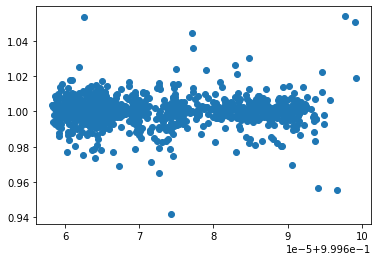

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(pred[-1000:],actual[-1000:])

In [ ]:
pred

NameError: ignored